### Libraries and Settings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec

In [3]:
pd.set_option('display.max_columns', None)

### Import Data

In [4]:
raw = pd.read_csv('data/Model Train.csv').drop('Unnamed: 0', axis=1)
raw = raw.set_index('Id')

In [5]:
raw.shape

(1168, 80)

In [6]:
nrow = raw.shape[0]

In [7]:
raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
134,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,Gd,TA,PConc,Ex,TA,No,GLQ,1005,Unf,0,262,1267,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2,471,TA,TA,Y,192,25,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,220000
291,60,RL,120.0,15611,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1079,1079,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,2,685,Gd,TA,Y,0,51,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,233230
25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
1094,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,8,1965,1998,Hip,CompShg,MetalSd,MetalSd,BrkFace,166.0,TA,TA,CBlock,TA,TA,Mn,GLQ,661,Unf,0,203,864,GasA,Gd,Y,SBrkr,1200,0,0,1200,1,0,1,1,1,1,Gd,6,Typ,0,NaN,Detchd,1977.0,Unf,2,884,TA,TA,Y,0,64,0,0,0,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
1289,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2000,2000,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1158,Unf,0,343,1501,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,2,0,2,1,Ex,5,Typ,1,Ex,Attchd,2000.0,Fin,2,499,TA,TA,Y,212,59,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,278000


In [9]:
raw.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,968.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1162.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1103.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,57.380137,69.922521,10475.468322,6.098459,5.574486,1970.818493,1984.89726,103.981067,451.310788,48.506849,562.475171,1062.292808,1168.761130,346.226027,6.023973,1521.011130,0.437500,0.057363,1.565925,0.375856,2.867295,1.051370,6.529110,0.607021,1978.461469,1.774829,474.297945,94.683219,46.218322,24.055651,3.567637,13.094178,1.879281,45.148973,6.340753,2007.805651,180622.219178
std,42.565874,23.851557,9840.711729,1.381627,1.105226,30.589573,20.68455,183.954961,463.681350,167.134938,446.157623,451.339404,394.744672,436.681046,48.040287,525.264165,0.521547,0.236289,0.548367,0.498497,0.812515,0.228474,1.591809,0.639075,24.790778,0.746187,214.239002,126.088796,64.832282,63.815148,30.535027,49.499687,32.284457,542.880405,2.739845,1.332117,79253.668338
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.00000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1953.000000,1967.00000,0.000000,0.000000,0.000000,216.000000,795.000000,884.000000,0.000000,0.000000,1134.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129375.000000
50%,50.000000,68.000000,9545.000000,6.000000,5.000000,1973.000000,1994.00000,0.000000,392.000000,0.000000,460.000000,995.000000,1085.500000,0.000000,0.000000,1470.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161250.000000
75%,70.000000,80.000000,11588.000000,7.000000,6.000000,2000.000000,2004.00000,160.000000,721.000000,0.000000,808.000000,1304.000000,1405.500000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.00000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
print(raw.isnull().sum().to_string())

MSSubClass          0
MSZoning            0
LotFrontage       200
LotArea             0
Street              0
Alley            1095
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
MasVnrArea          6
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           31
BsmtCond           31
BsmtExposure       32
BsmtFinType1       31
BsmtFinSF1          0
BsmtFinType2       32
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

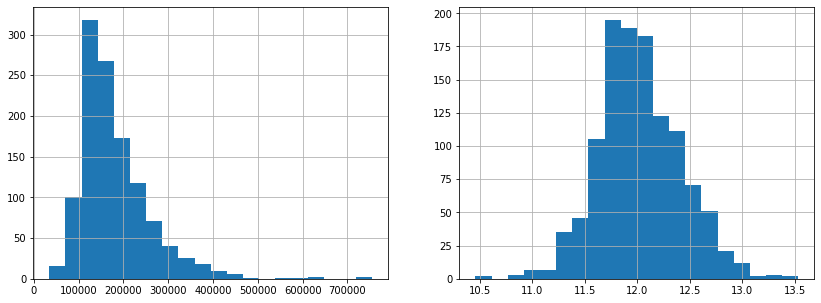

In [11]:
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

raw['SalePrice'].hist(bins=20,ax=ax1)
raw['logPrice'] = np.log(raw['SalePrice'])
raw['logPrice'].hist(bins=20,ax=ax2)

Log transmation makes price semi gaussian.

### Define functions

In [12]:
def plotCat(cat,sort = False):
    fig = plt.figure(figsize=(14, 5))
    gs = gridspec.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])

    perct = cat.value_counts(sort=sort)/nrow
    perct.plot.bar(ax=ax1)
    ax2.tick_params(axis='x',labelrotation=90)
    sns.boxplot(cat,raw['logPrice'],order=perct.index,ax=ax2)

### MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

0


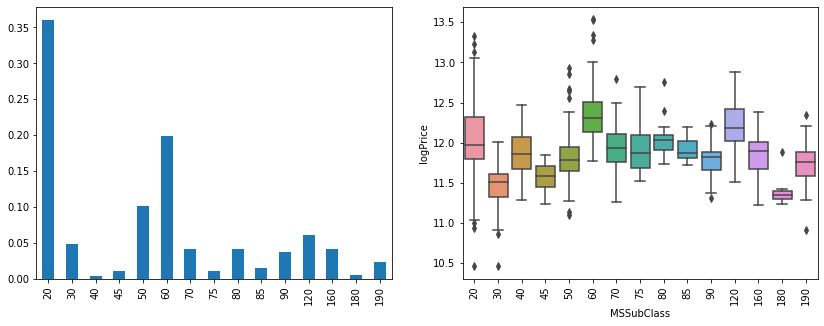

In [13]:
print(raw['MSSubClass'].isna().sum())
plotCat(raw['MSSubClass'])

Need to transform this feature.
1. PUD or not
2. Largely consistent info with BldgType (DUPLEX and 2 FAMILY CONVERSION) and HouseStyle (stories etc.).
3. Check consistency of age from other columns. Then remove this redundent info.
4. Other information: finished attic.

### MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [14]:
raw['MSZoning'].isna().sum()

0

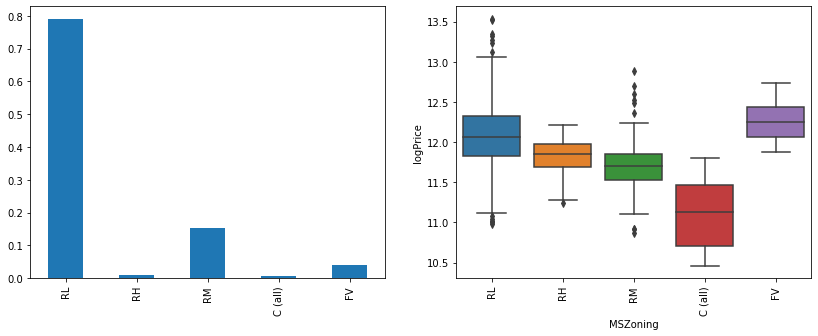

In [15]:
plotCat(raw['MSZoning'])

C and RL are substantially under-sampled. Price difference among categories. Dummify using RL as baseline.

### LotFrontage

LotFrontage: Linear feet of street connected to property

In [14]:
raw['LotFrontage'].isna().sum()

200

In [15]:
raw[raw['LotFrontage'].isnull()].sample(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logPrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,9,1939,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,No,BLQ,341,Unf,0,457,798,GasA,Ex,Y,SBrkr,1137,817,0,1954,0,1,1,1,3,1,Gd,8,Typ,2,TA,Attchd,1939.0,Unf,2,431,TA,TA,Y,0,119,150,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500,12.649155
683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996.0,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,173000,12.061047
710,20,RL,NaN,7162,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkCmn,41.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,876,876,GasA,TA,Y,SBrkr,904,0,0,904,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,Unf,1,408,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2008,WD,Abnorml,109900,11.607326
929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,236500,12.373703
209,60,RL,NaN,14364,Pave,NaN,IR1,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,2Story,7,5,1988,1989,Gable,CompShg,Plywood,Plywood,BrkFace,128.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1065,Unf,0,92,1157,GasA,Ex,Y,SBrkr,1180,882,0,2062,1,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1988.0,Fin,2,454,TA,TA,Y,60,55,0,0,154,0,NaN,NaN,NaN,0,4,2007,WD,Normal,277000,12.531773
1031,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,2Story,5,8,1916,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0,Unf,0,686,686,GasA,Gd,Y,SBrkr,948,980,0,1928,0,0,2,0,5,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,228,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,160000,11.982929
1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1965,1965,Hip,CompShg,HdBoard,Plywood,BrkFace,114.0,TA,TA,CBlock,TA,TA,No,BLQ,560,LwQ,375,0,935,GasA,TA,Y,SBrkr,935,0,0,935,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1965.0,Unf,1,288,TA,TA,Y,180,0,0,0,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,137000,11.827736
67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,1970,1989,Gable,CompShg,Plywood,Plywood,BrkFace,287.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,912,Unf,0,1035,1947,GasA,TA,Y,SBrkr,2207,0,0,2207,1,0,2,0,3,1,TA,7,Min1,1,Gd,Attchd,1970.0,RFn,2,576,TA,TA,Y,301,0,0,0,0,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000,12.100712
786,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,1Fam,1Story,6,5,1967,1967,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,251,LwQ,630,491,1372,GasA,TA,Y,SBrkr,1342,0,0,1342,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1967.0,Unf,2,457,TA,TA,Y,0,0,0,0,197,0,NaN,NaN,NaN,0,9,2009,WD,Normal,161500,11.992260


I checked columns that are likely related to LotFrontage, but don't see any patterns. May use kNN to impute from the following features: LotArea, LotConfig, Street, MSZoning, LotShape, LandContour, LandSlope. Or use a correlation matrix to select features for imputation. Also, I guess this feature is highly correlated to LotArea and LotConfig, so might be removed during feature selection due to multicollinearity anyway.

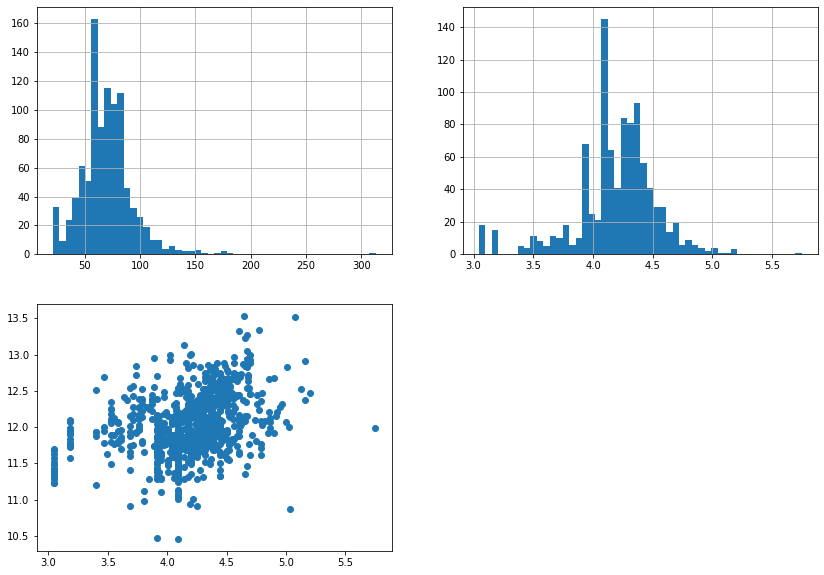

In [16]:
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])

raw['LotFrontage'].hist(bins=50,ax=ax1)
np.log(raw['LotFrontage']).hist(bins=50,ax=ax2)
# raw.plot.scatter('LotFrontage','logPrice',ax=ax3,logx=True)
plt.scatter(np.log(raw['LotFrontage']),raw['logPrice'])

Skewed. A log transformation should be sufficient. A few spikes on the histogram, should be okay. An outlier with extra large LotFrontage, looks okay after log transformation.

### LotArea

LotArea: Lot size in square feet

In [17]:
raw['LotArea'].isna().sum()

0

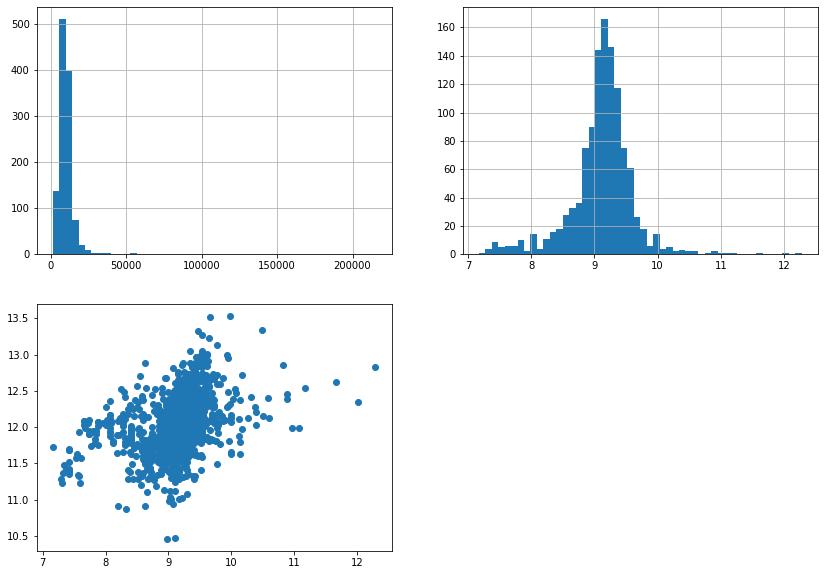

In [18]:
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])

raw['LotArea'].hist(bins=50,ax=ax1)
np.log(raw['LotArea']).hist(bins=50,ax=ax2)
# raw.plot.scatter('LotFrontage','logPrice',ax=ax3,logx=True)
plt.scatter(np.log(raw['LotArea']),raw['logPrice'])

Same as LotFrontage, need a log transformation.

### Street

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [19]:
raw['Street'].isna().sum()

0

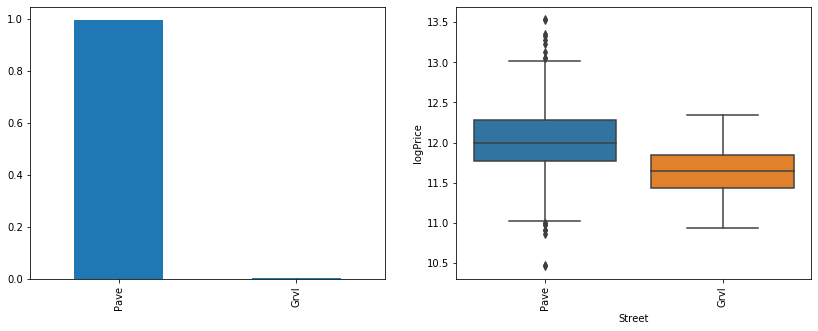

In [20]:
plotCat(raw['Street'])

Dummify using Pave as baseline.

### Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [21]:
raw['Alley'].isna().sum()

1095

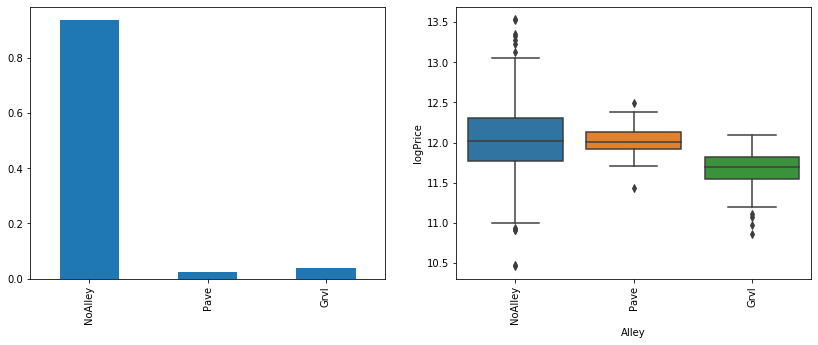

In [22]:
alley = raw['Alley'].fillna('NoAlley')
plotCat(alley)

In [23]:
raw['Alley'].value_counts()/nrow

Grvl    0.039384
Pave    0.023116
Name: Alley, dtype: float64

Impute with NoAlley. Dummify with NoAllay as baseline.

### LotShape

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [24]:
raw['LotShape'].isna().sum()

0

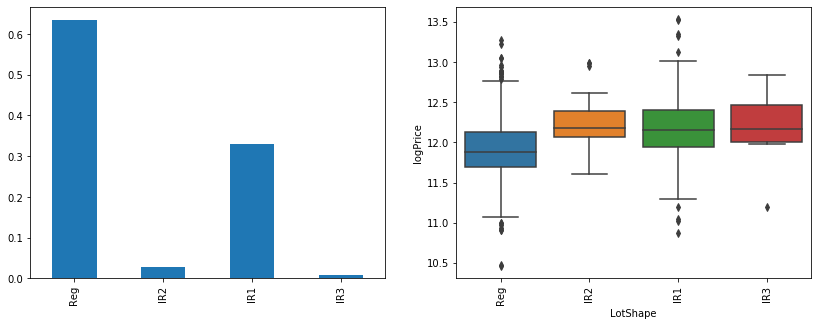

In [25]:
plotCat(raw['LotShape'])

Irregular housese are more expensive on average. Interesting. Maybe it's because irregular houses are bigger? Dummify with Reg as baseline.

### LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [26]:
raw['LandContour'].isna().sum()

0

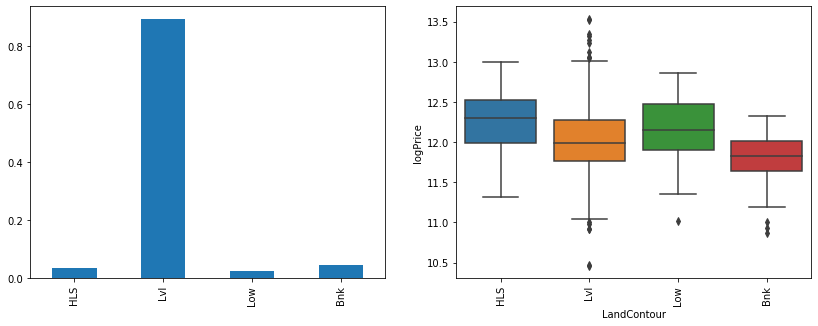

In [27]:
plotCat(raw['LandContour'])

Dummify with Lvl as baseline. Hillside is most expensive. Banked is least expensive. Interesting.

### Utilities

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [28]:
raw['Utilities'].isna().sum()

0

In [29]:
raw['Utilities'].value_counts()

AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64

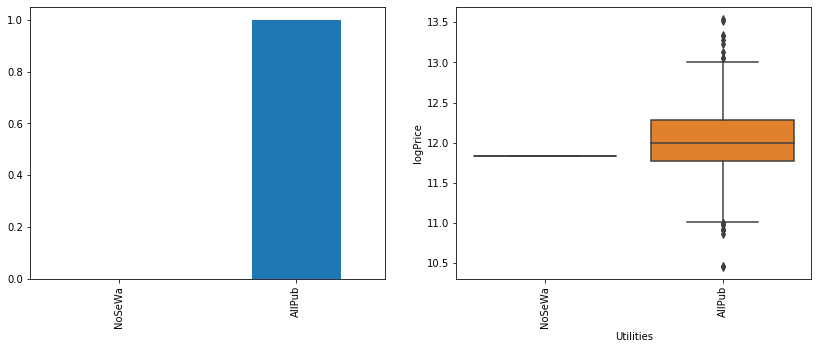

In [30]:
plotCat(raw['Utilities'])

Only one house with 'NoSeWa'. We'd better drop this feature?

### LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [31]:
raw['LotConfig'].isna().sum()

0

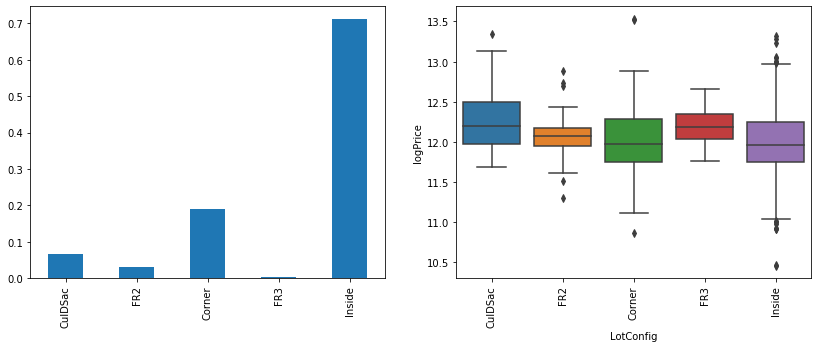

In [32]:
plotCat(raw['LotConfig'])

Dummify with Inside as baseline. Maybe okay to combine FR3 and FR2?

### LandSlope

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

0


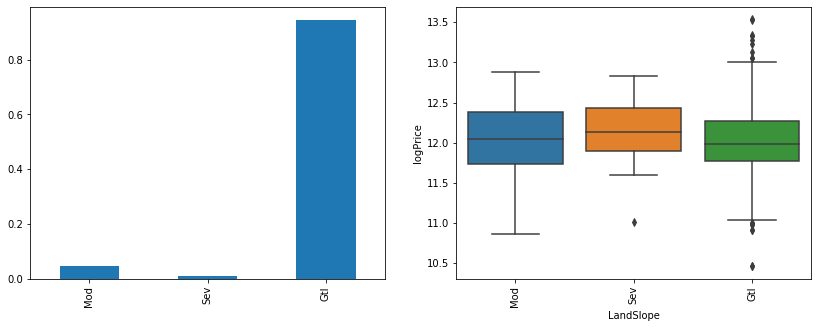

In [33]:
print(raw['LandSlope'].isna().sum())
plotCat(raw['LandSlope'])

No significant linear impact on price. Dummify with Gtl as baseline. Combine Sev and Mod?

### Neighborhood

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

0


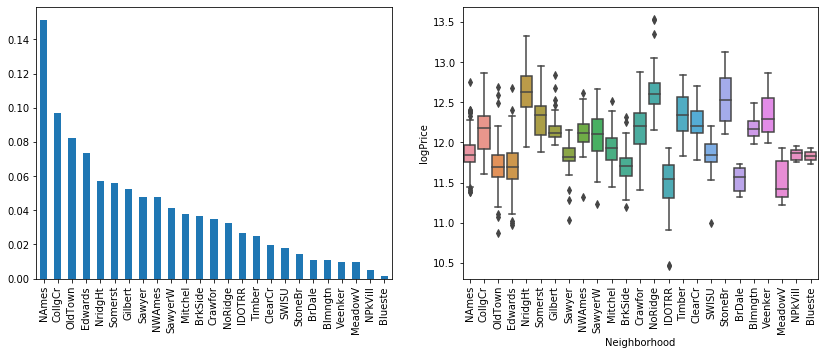

In [34]:
print(raw['Neighborhood'].isna().sum())
plotCat(raw['Neighborhood'],sort=True)

In [35]:
raw['Neighborhood'].value_counts()

NAmes      177
CollgCr    113
OldTown     96
Edwards     86
NridgHt     67
Somerst     65
Gilbert     61
Sawyer      56
NWAmes      56
SawyerW     48
Mitchel     44
BrkSide     43
Crawfor     41
NoRidge     38
IDOTRR      31
Timber      29
ClearCr     23
SWISU       21
StoneBr     17
BrDale      13
Blmngtn     13
Veenker     11
MeadowV     11
NPkVill      6
Blueste      2
Name: Neighborhood, dtype: int64

A very important feature. Dummify with NAmes as baseline. But how to deal with the neighborhoods with a few samples?

### Condition1

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

0


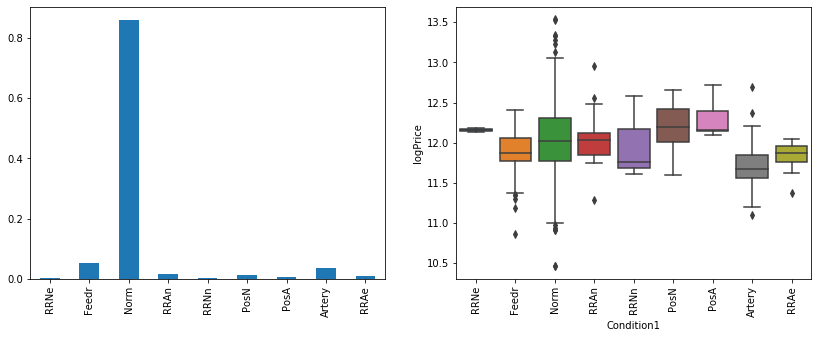

In [36]:
print(raw['Condition1'].isna().sum())
plotCat(raw['Condition1'])

### Condition2

Condition2: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

0


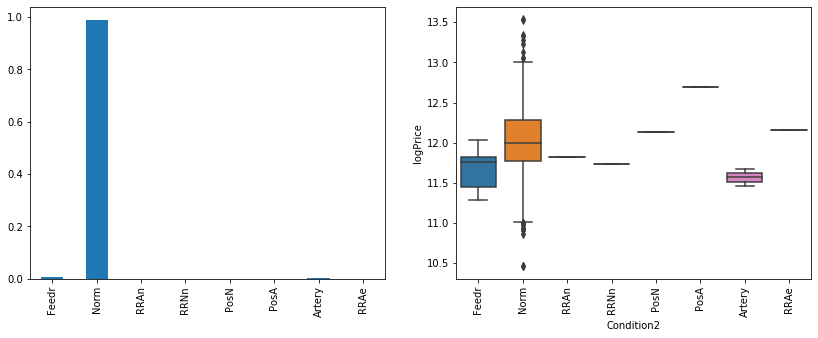

In [37]:
print(raw['Condition2'].isna().sum())
plotCat(raw['Condition2'])

Combine Condition1 and Condition2. Dummify with Norm as baseline.

### BldgType

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

0


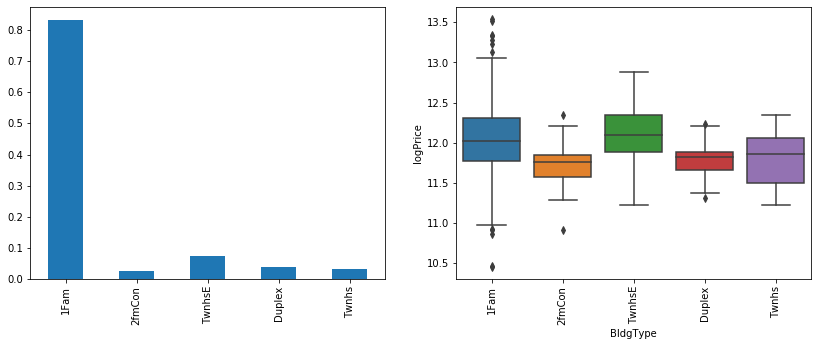

In [38]:
print(raw['BldgType'].isna().sum())
plotCat(raw['BldgType'])

In [39]:
print(raw[raw['MSSubClass']==190]['BldgType'].value_counts())
print(raw[raw['BldgType']=='2fmCon']['MSSubClass'].value_counts())

2fmCon    28
Name: BldgType, dtype: int64
190    28
20      1
Name: MSSubClass, dtype: int64


One '2fmCon' in BldgType is classified as 20 (1-STORY 1946 & NEWER ALL STYLES) in MSSubClass. Not a problem because we'll use BldgType, not MSSubClass.

In [40]:
print(raw[raw['MSSubClass']==90]['BldgType'].value_counts())
print(raw[raw['BldgType']=='Duplex']['MSSubClass'].value_counts())

Duplex    44
Name: BldgType, dtype: int64
90    44
Name: MSSubClass, dtype: int64


Consistent.

### HouseStyle

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

0


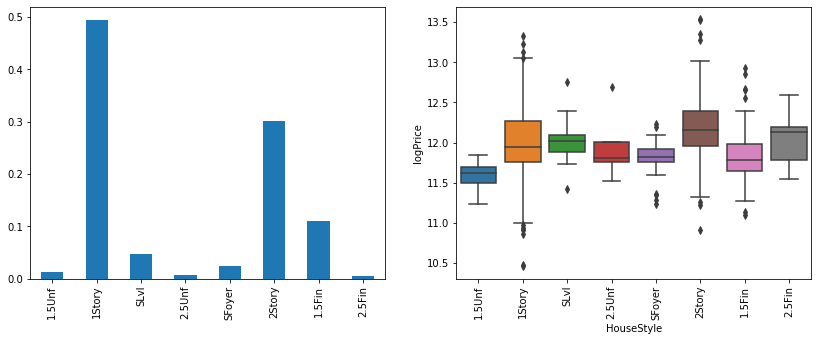

In [41]:
print(raw['HouseStyle'].isna().sum())
plotCat(raw['HouseStyle'])

In [42]:
# print(raw[raw['HouseStyle']=='1Story']['MSSubClass'].value_counts(sort=False))
# # Consistent.
# print(raw[raw['HouseStyle']=='1.5Fin']['MSSubClass'].value_counts(sort=False))
# One 1.5Fin is classified inconsistently in MSSubClass.
# print(raw[raw['HouseStyle']=='1.5Unf']['MSSubClass'].value_counts(sort=False))
# # One 1.5Unf is classified inconsistently in MSSubClass.
# print(raw[raw['HouseStyle']=='2Story']['MSSubClass'].value_counts(sort=False))
# # Five 2Story are classified inconsistently in MSSubClass.
# print(raw[raw['HouseStyle']=='2.5Fin']['MSSubClass'].value_counts(sort=False))
# # One 2.5Fin is classified inconsistently in MSSubClass.
# print(raw[raw['HouseStyle']=='2.5Unf']['MSSubClass'].value_counts(sort=False))
# # Consistent.
# print(raw[raw['HouseStyle']=='SFoyer']['MSSubClass'].value_counts(sort=False))
# # One SFoyer is classified inconsistently in MSSubClass.
# print(raw[raw['HouseStyle']=='SLvl']['MSSubClass'].value_counts(sort=False))
# Two SLvl are classified inconsistently in MSSubClass.

Largely consistent with MSSubClass.

Dummify with 1Story as baseline. Comebine small groups with their bigger neighbors?

### OverallQual

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

0


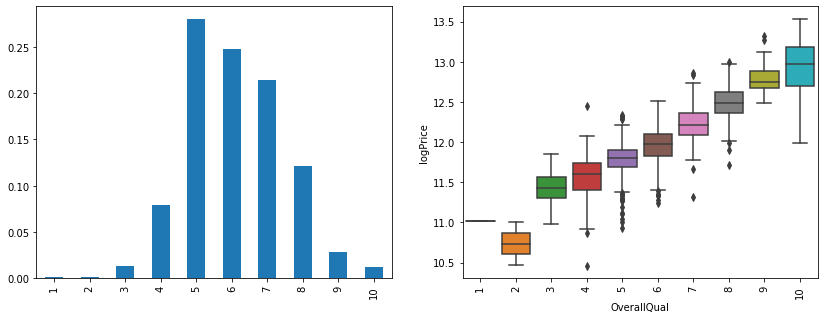

In [43]:
print(raw['OverallQual'].isna().sum())
plotCat(raw['OverallQual'])

Nicely ordered categorical feature with bell shape. Strong linear correlation with logPrice. Use as a numeric feature.

### OverallCond

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

0


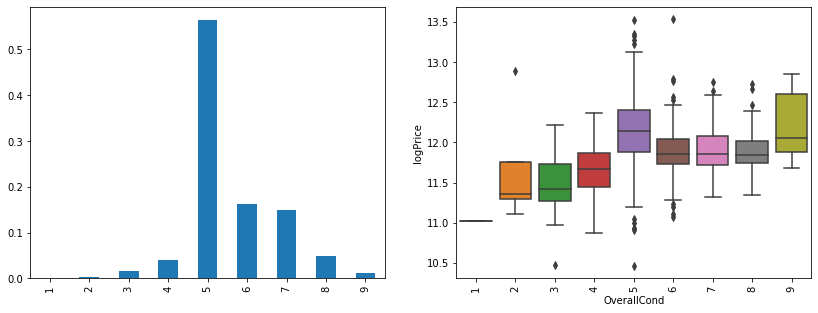

In [44]:
print(raw['OverallCond'].isna().sum())
plotCat(raw['OverallCond'])

Nicely ordered categorical feature with bell shape. Some linear correlation with logPrice. Use as a numeric feature. MinMax scale. 

### YearBuilt

YearBuilt: Original construction date

0


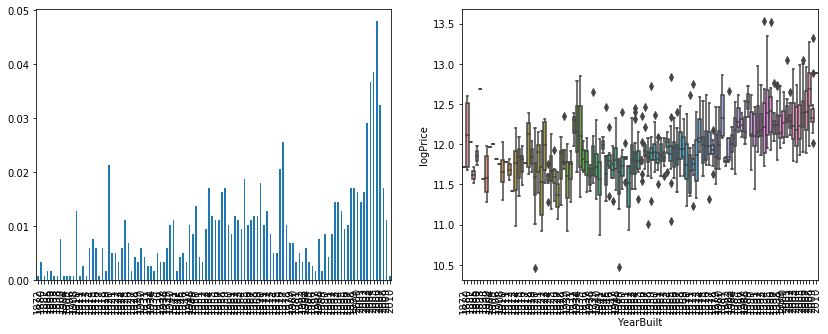

In [45]:
print(raw['YearBuilt'].isna().sum())
plotCat(raw['YearBuilt'])

Nonlinear correlation with logPrice. Overall positive correlation with logPrice. Curving up a little bit at the left end, i.e., older houses become more expensive. Convert to age then MinMax scale?

### YearRemodAdd

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

0


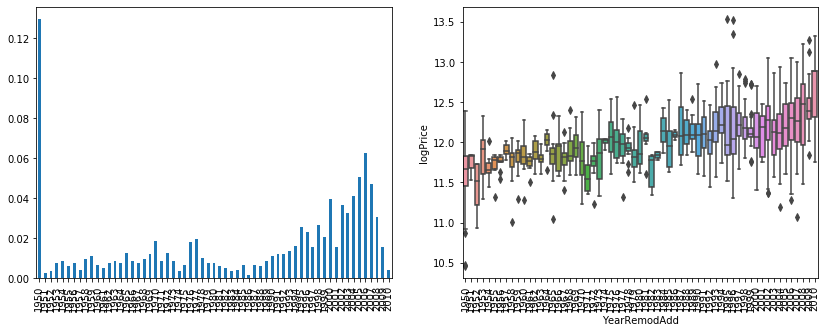

In [46]:
print(raw['YearRemodAdd'].isna().sum())
plotCat(raw['YearRemodAdd'])

151 houses remodeled in 1950? Odd, but the logPrice seems to be in line with the whole trend. So should be Okay. Convert to years since remodel then MinMax scale?

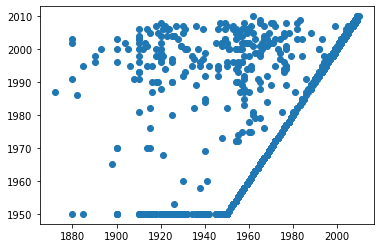

In [47]:
plt.scatter(raw['YearBuilt'],raw['YearRemodAdd'])